In [1]:
import pywt
import numpy as np
import time
import cv2
import matplotlib.pyplot as plt

In [117]:
imgname = '1.jpg'
wmname = 'wm.png'
Q = 0.1
ori_img = cv2.imread('./data/'+imgname)
img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2YCrCb)
Y_split = img[:,:,0]
print(ori_img.shape)
img1 = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
wm  = cv2.imread('./data/'+wmname,cv2.IMREAD_GRAYSCALE)
outname = './output/'+'dwt_'+imgname

(512, 512, 3)


(614, 128)
长度缩放比例： 1.0047925
宽度缩放比例： 1.9900066
旋转角度： 0.0
耗费时间: 148.9999294281006 ms


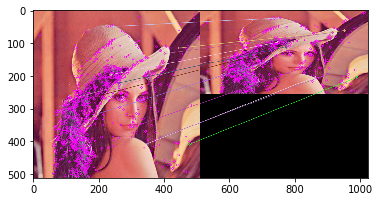

In [118]:
img1 = cv2.imread('./data/'+imgname)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) #灰度处理图像
time_start=time.time()
sift = cv2.xfeatures2d.SIFT_create()
kp3, des3 = sift.detectAndCompute(img1,None)   #des是描述子
# print(len())
img3 = cv2.drawKeypoints(img1,kp3,img1,color=(255,0,255)) #画出特征点，并显示为红色圆圈
cv2.imwrite('sift3.jpg',img3)

img2 = cv2.imread('./data/2.jpg')
kp4, des4 = sift.detectAndCompute(img2,None)   #des是描述子
print(des4.shape)
img4 = cv2.drawKeypoints(img2,kp4,img2,color=(255,0,255)) #画出特征点，并显示为红色圆圈
cv2.imwrite('sift4.jpg',img4)

point3 = cv2.KeyPoint_convert(kp3) # 原图特征点的坐标集
point4 = cv2.KeyPoint_convert(kp4) # 测试图像特征点的坐标集

# 调整ratio
good = []
bf = cv2.BFMatcher()
matches = bf.knnMatch(des3,des4, k=2) #matchs包含与原图特征点最接近的两个特征点
h_scale = []
v_scale = []
for m,n in matches:
    if m.distance < 0.6*n.distance:
        good.append([m])
        h_scale.append(point3[m.queryIdx][0]/point4[m.trainIdx][0]) # m.trainIdx][0] 横坐标
        v_scale.append(point3[m.queryIdx][1]/point4[m.trainIdx][1]) # m.trainIdx][1] 纵坐标
        
time_end=time.time()
print('长度缩放比例：',np.mean(np.array(h_scale)))
print('宽度缩放比例：',np.mean(np.array(v_scale)))
print('旋转角度：',np.array(0.00))
print('耗费时间:', (time_end - time_start)*1000,'ms')
img5 = cv2.drawMatchesKnn(img1,kp3,img2,kp4,good,None,flags=2)
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
plt.imshow(img5)
plt.show()

In [51]:
# print(point[:10])